# Multiple linear regression models

本节需要的包：


In [23]:
require(s20x)


## Example: Modelling birth weights using several explanatory variables

我们学习了如何使用线性模型来建模数值和/或因子解释变量的影响。更一般地，原则上我们可以拟合任意数量的解释变量。然而，我们将看到这并不总是一个好主意。需要谨慎处理。举例来说，让我们研究可能解释婴儿出生体重的变量是什么。

## Exploring relationships between the variables

Let us first inspect the relationships between the numerical explanatory variables and the response variable.

The five variables are in columns 1,2,4,5 and 6 in the data frame Babies.df.


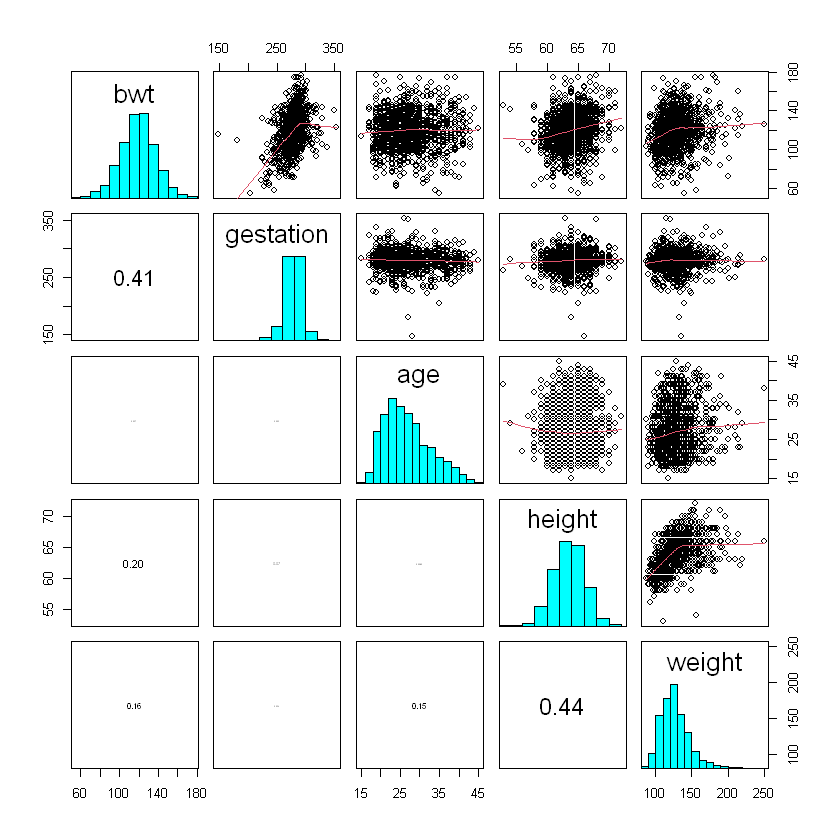

In [24]:
## Invoke the s20x library
library(s20x)
## Importing data into R
Babies.df <- read.table("../data/babies_data.txt", header = T)
## Create the pairs plot of the five numeric variables
pairs20x(Babies.df[, c(1, 2, 4, 5, 6)])


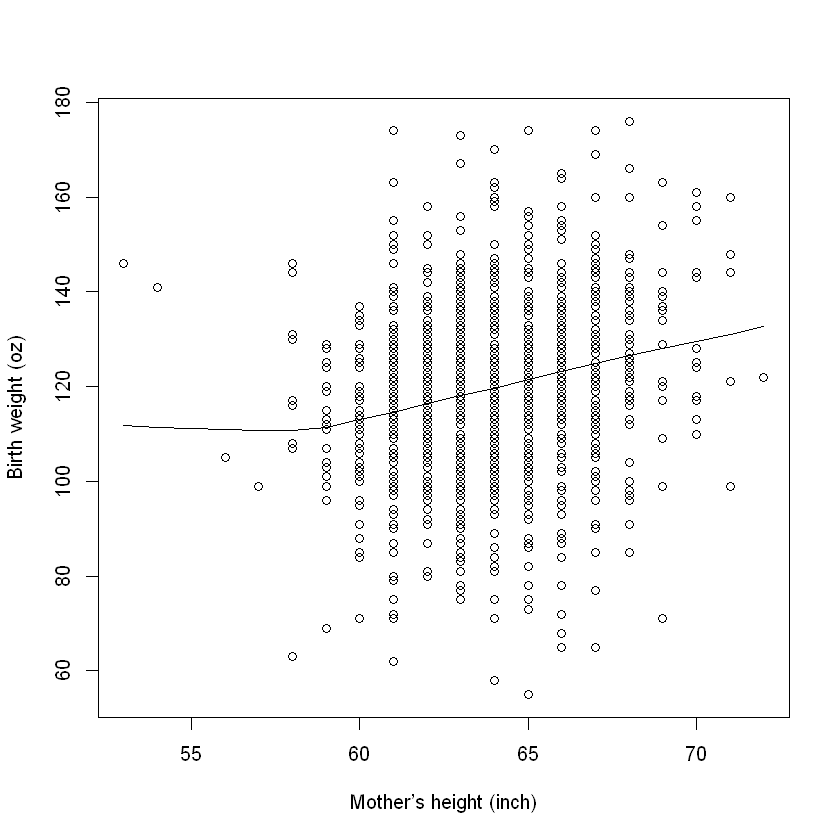

In [25]:
plot(bwt ~ height,
    data = Babies.df,
    xlab = "Mother’s height (inch)", ylab = "Birth weight (oz)"
)
lines(lowess(Babies.df$height, Babies.df$bwt))


In [26]:
summary(lm(bwt ~ height, data = Babies.df))$r.squared
cor(Babies.df$bwt, Babies.df$height)^2 # R 方是差异的平方，所以跟上边那个是一样的


[1] 0.04149539

[1] 0.04149539

Looking at the pairs plot again, we also see a somewhat weak relationship between `bwt` and mother’s `weight`.

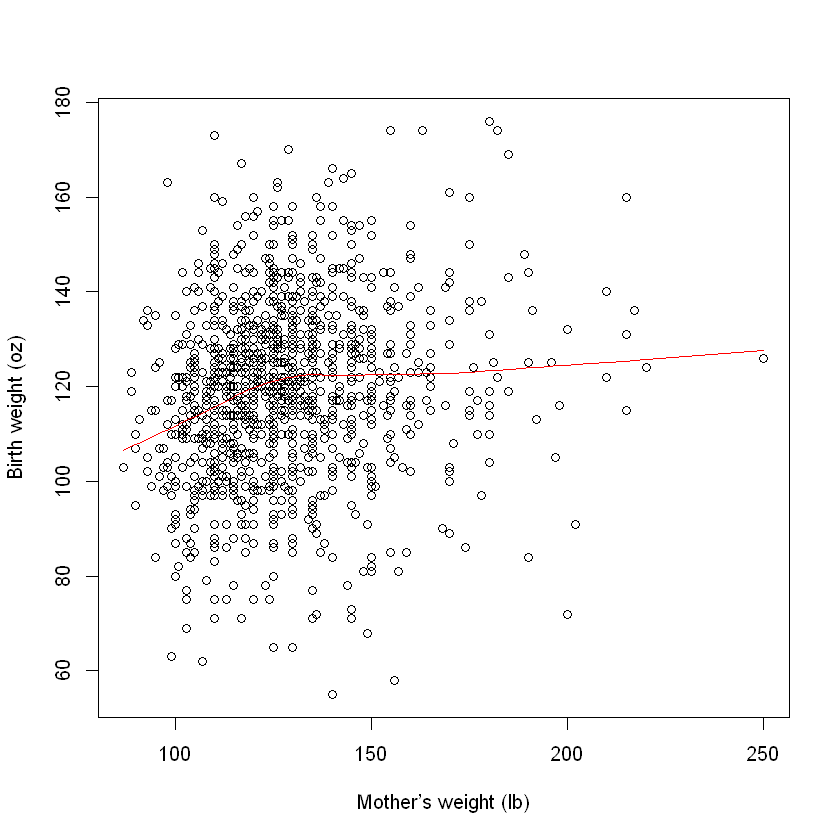

In [27]:
plot(bwt ~ weight,
    data = Babies.df,
    xlab = "Mother’s weight (lb)",
    ylab = "Birth weight (oz)"
)
lines(lowess(Babies.df$weight, Babies.df$bwt), col = "red")


胎儿孕育时间与其出生体重之间存在更强的关系，这并不令人意外，因为孩子在母亲子宫内的时间越长，孩子就有更多的时间来获得营养和生长。但是，在某个特定的胎龄后，这种关系显然会变得平缓起来 - 有些人称其为“曲棍球杆形状的曲线”。

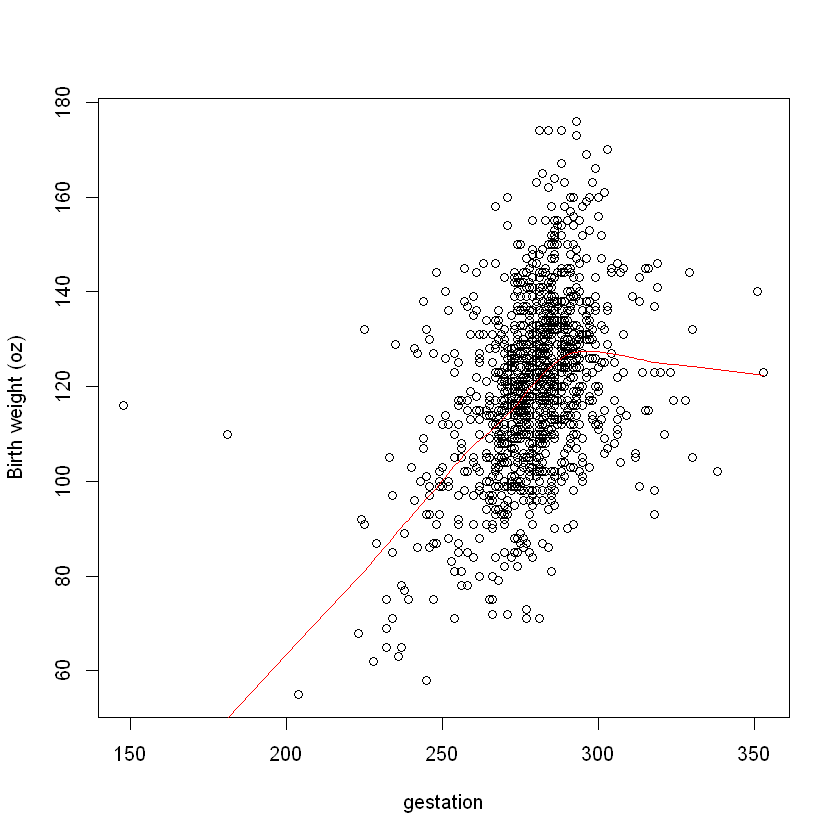

In [28]:
plot(bwt ~ gestation, data = Babies.df, ylab = "Birth weight (oz)")
lines(lowess(Babies.df$gestation, Babies.df$bwt), col = "red")


There does not seem to be any relationship between a mother’s age and her child’s `bwt`.

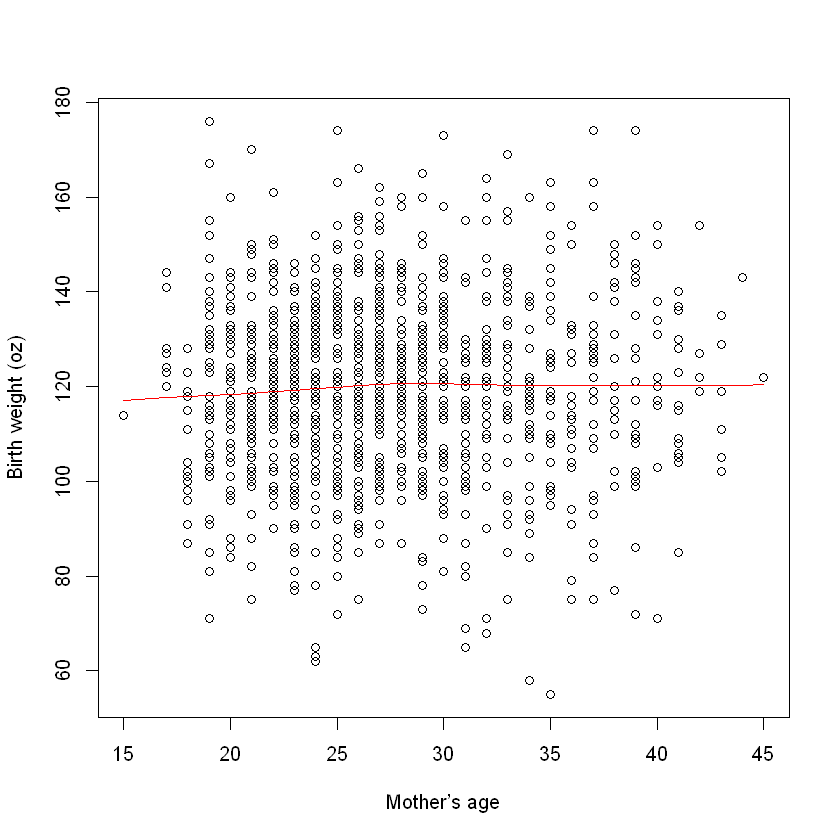

In [29]:
plot(bwt ~ age,
    data = Babies.df,
    xlab = "Mother’s age",
    ylab = "Birth weight (oz)"
)
lines(lowess(Babies.df$age, Babies.df$bwt), col = "red")


Note: There seem to be some outlying data points(一些偏远的数据点) in these plots. There does not appear to be much of a relationship between the x variables, except between `height` and `weight`.

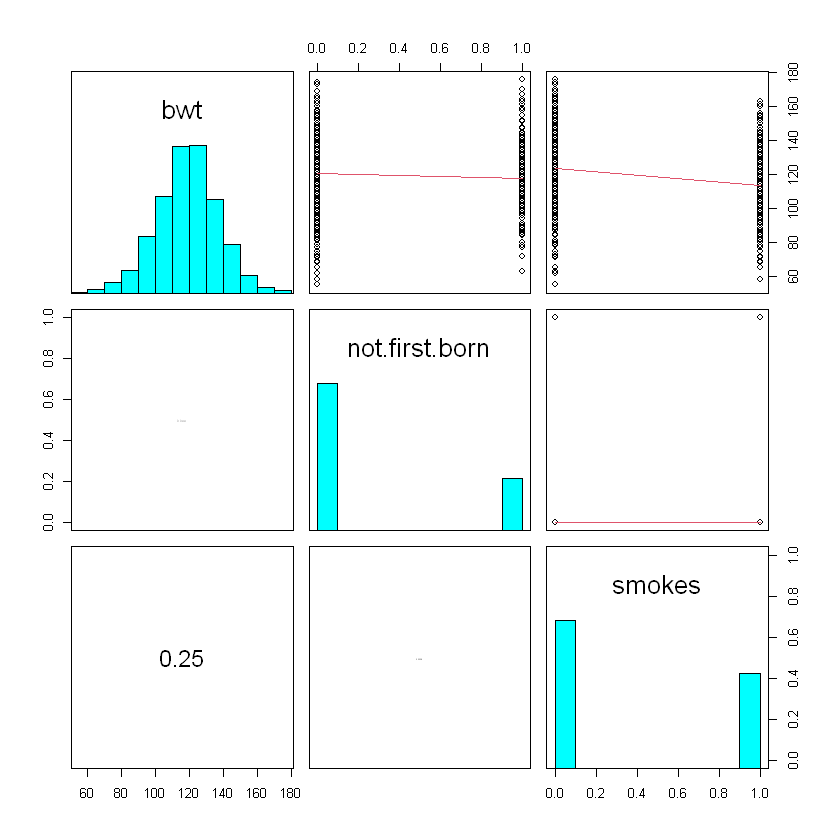

In [30]:
pairs20x(Babies.df[, c(1, 3, 7)])


让我们从理解“解释”的角度开始，因为它是最强大的关系之一。那些不典型的数据点已经用问号标记了。我们稍后会添加其他的解释变量。

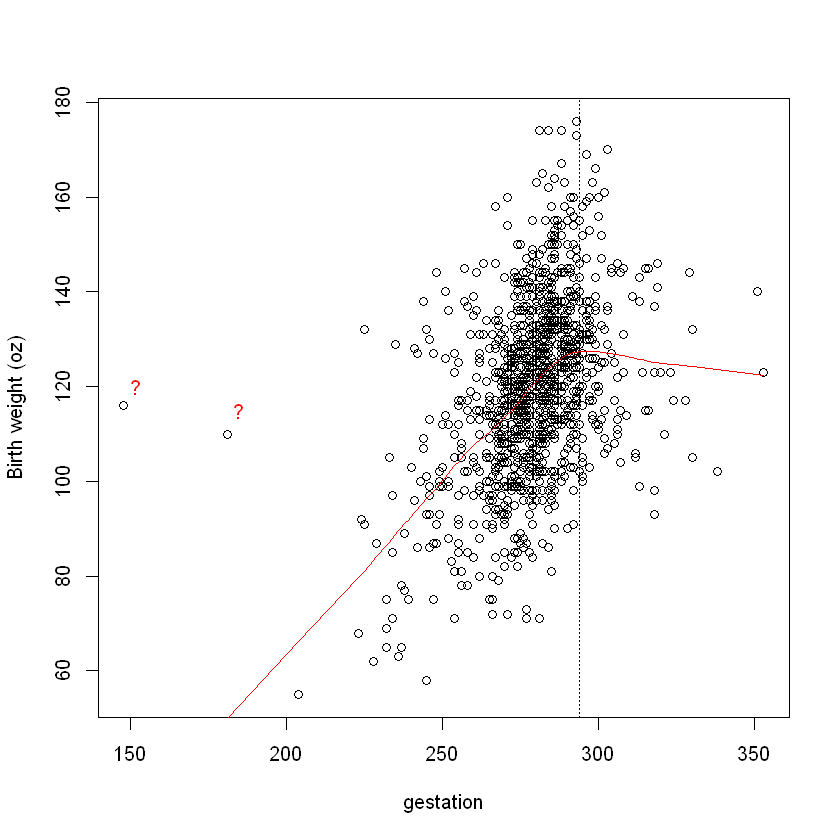

In [31]:
plot(bwt ~ gestation, data = Babies.df, ylab = "Birth weight (oz)")
lines(lowess(Babies.df$gestation, Babies.df$bwt), col = "red")
text(c(152, 185), c(120, 115), "?", col = "red")
abline(v = 294, lty = 3)


They look extremely implausible as they have typical birth-weight but have a gestational age that is extremely low for these data. 他们看起来非常难以置信,因为他们典型的出生体重但有孕龄,对这些数据是极低的。

In [32]:
id <- (Babies.df$gestation < 200)
Babies.df[id, ]


,bwt,gestation,not.first.born,age,height,weight,smokes
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
239,116,148,0,28,66,135,0
820,110,181,0,27,64,133,0


Relationship between birth weight and gestational age...

For `gestation` $\leq 294$ days we’ll use the familiar simple linear regression model

$$
\text{E[bwt]}=\beta_0+\text{gestation}\times\beta_1
$$

We’d like to extend this model by adding an extra term so that the slope changes when `gestation` $> 294$. That is,

$$
\text{E[bwt]}=\beta_0+\text{gestation}\times\beta_1+\text{v}\times\beta_2
$$

where v is some suitable explanatory variable. What should v be?

- For `gestation` $\leq 294$ the extended model is just the simple linear regression model, so that means v = 0 when gestation ≤ 294.

- For `gestation` $> 294$ we need another slope effect for gestational age. In fact, we need $v =$ `gestation` $- 294$.

Let’s create the new explanatory v = 294 that is described gestation above. We’ll give it the name because it is the number of days ODdays that the baby is overdue.

In [33]:
Babies.df$ODdays <- ifelse(
    Babies.df$gestation < 294,
    0,
    Babies.df$gestation - 294
)
head(Babies.df, 12) # Print first 12 lines of dataframe


,bwt,gestation,not.first.born,age,height,weight,smokes,ODdays
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,120,284,0,27,62,100,0,0
2,113,282,0,33,64,135,0,0
3,128,279,0,28,64,115,1,0
4,108,282,0,23,67,125,1,0
5,136,286,0,25,62,93,0,0
6,138,244,0,33,62,178,0,0
7,132,245,0,23,65,140,0,0
8,120,289,0,25,62,125,0,0
9,143,299,0,30,66,136,1,5


## Fitting the initial model

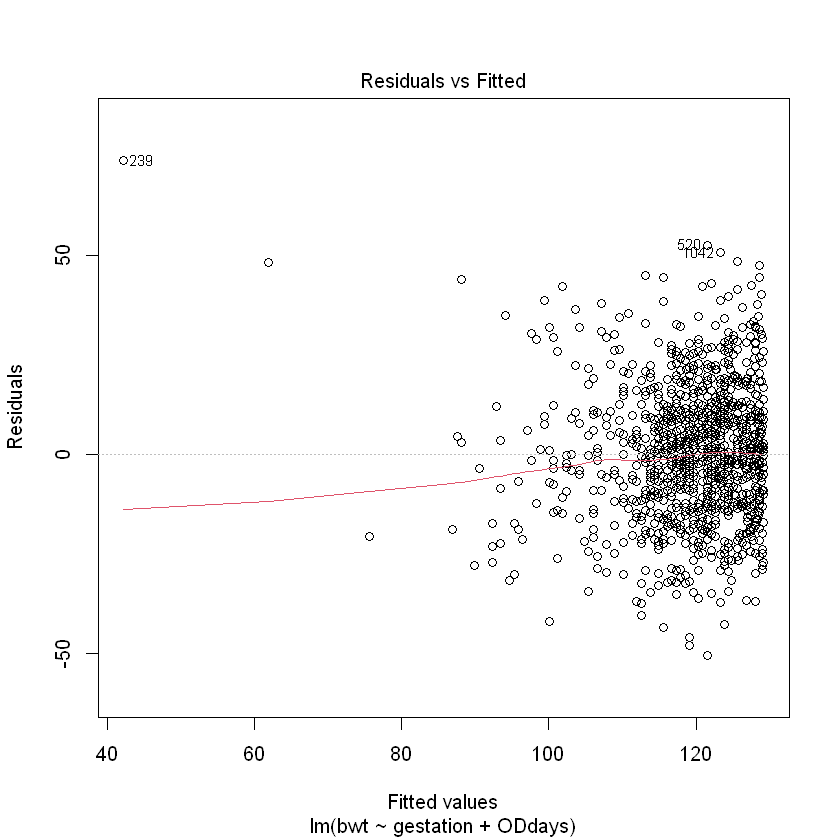

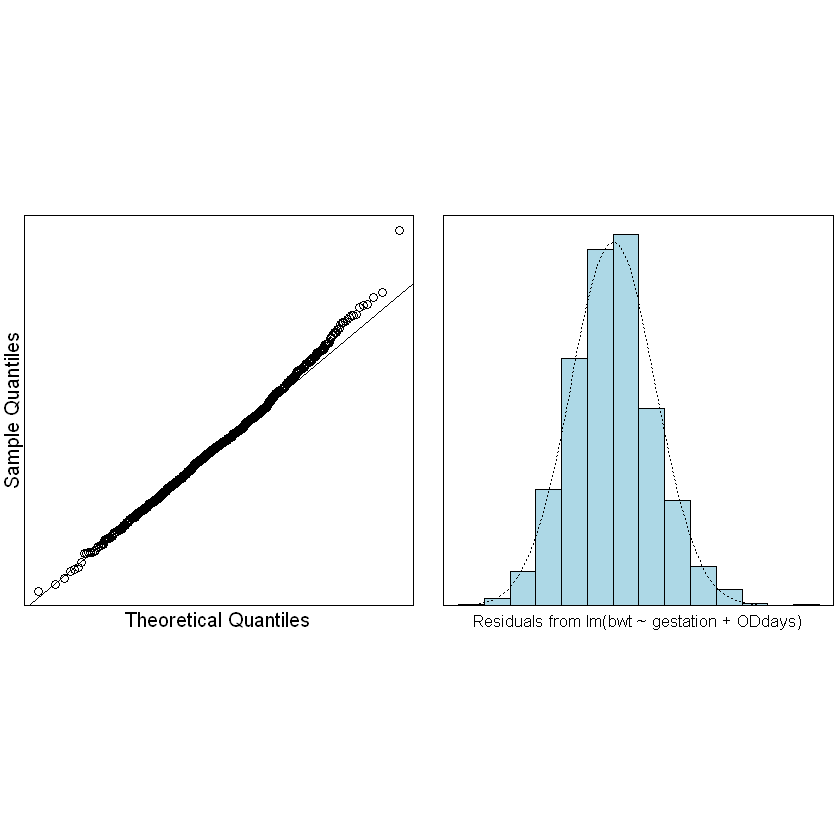

In [35]:
bwt.fit <- lm(bwt ~ gestation + ODdays, data = Babies.df)
plot(bwt.fit, which = 1, add.smooth = FALSE)
normcheck(bwt.fit)
cooks20x(bwt.fit)


Let us refit with observation 239 removed.

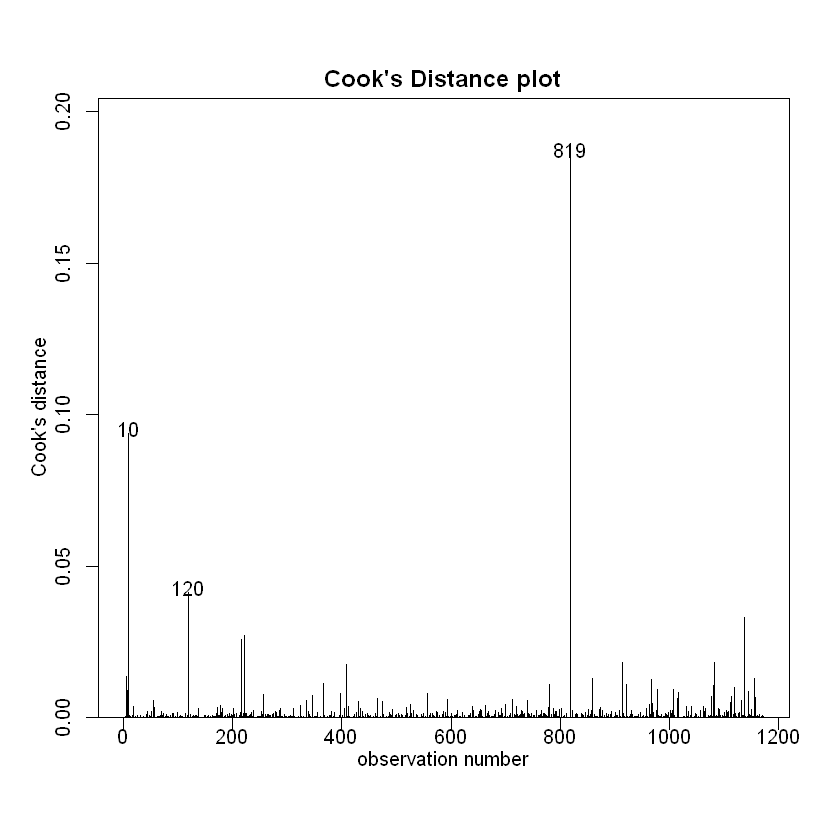

In [37]:
bwt.fit2 <- lm(bwt ~ gestation + ODdays, data = Babies.df[-239, ])
cooks20x(bwt.fit2)


We refit the model using the reduced data.

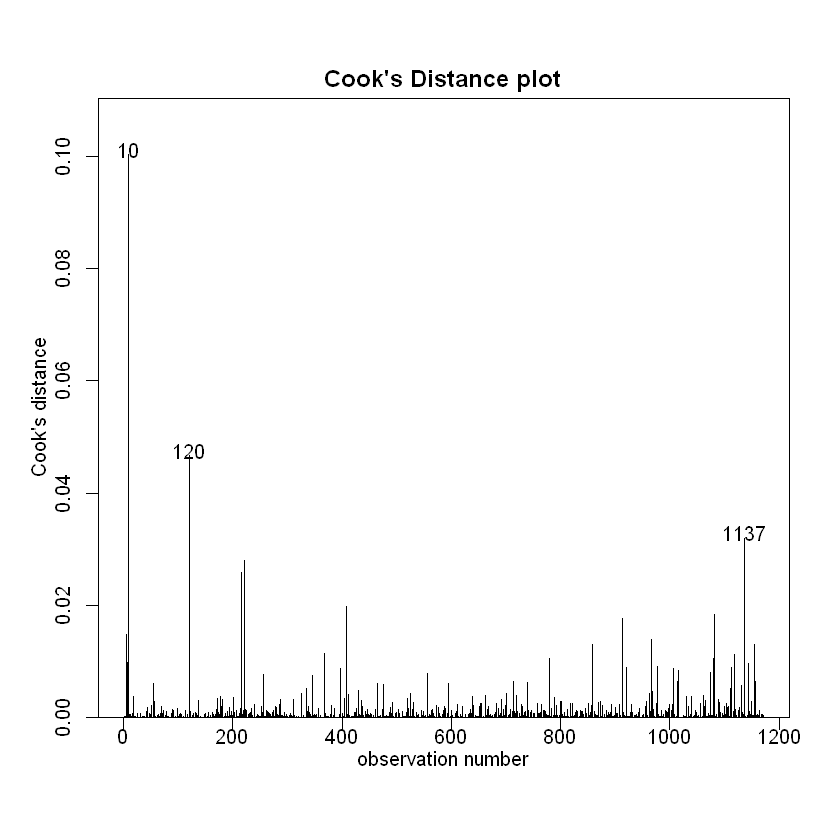

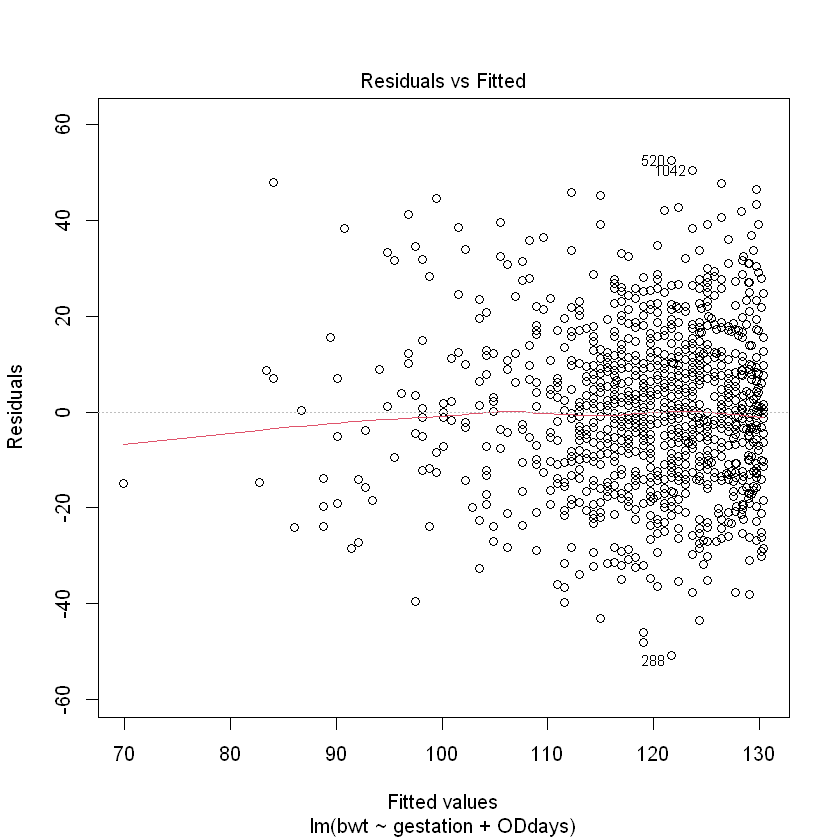

In [39]:
# This time we demonstrate using the subset argument to remove points
bwt.fit3 <- lm(bwt ~ gestation + ODdays,
    data = Babies.df,
    subset = -c(239, 820)
)
cooks20x(bwt.fit3)
plot(bwt.fit3, which = 1)


Let’s take a look at our fitted hockey stick model.

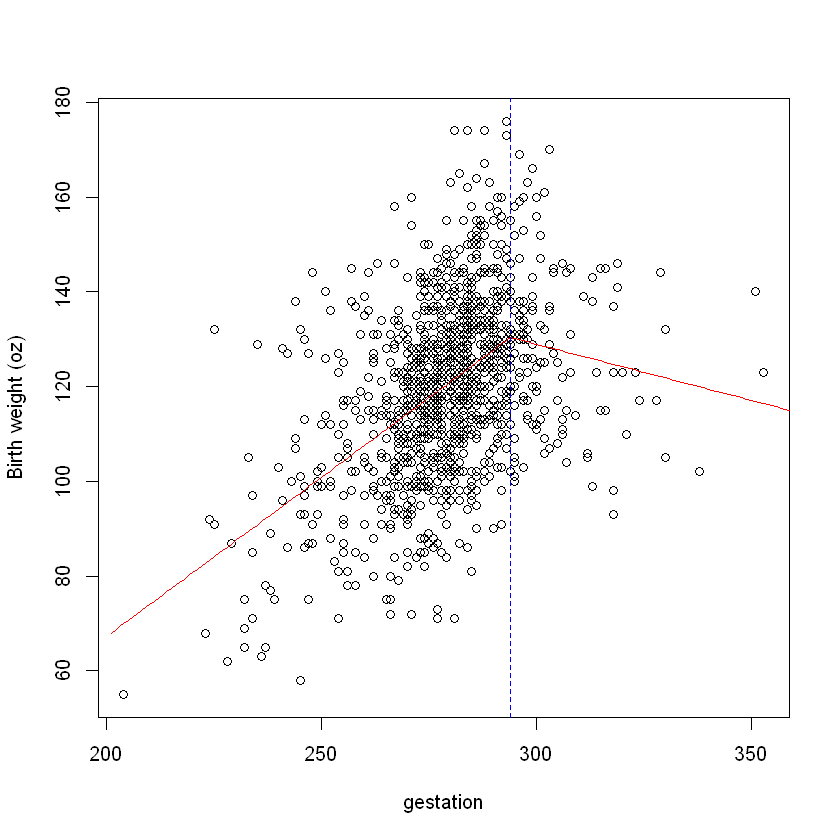

In [40]:
gestation.seq <- 201:360 # Explanatory values at which to get predictions
ODdays.seq <- ifelse(gestation.seq <= 294, 0, gestation.seq - 294)
fit.seq <- predict(bwt.fit3, new = data.frame(
    gestation = gestation.seq,
    ODdays = ODdays.seq
))
plot(bwt ~ gestation,
    data = Babies.df[-c(239, 820), ],
    ylab = "Birth weight (oz)"
)
lines(gestation.seq, fit.seq, col = "red")
abline(v = 294, lty = 2, col = "blue")


模型检查是好的，没有影响力的点依然存在，所以我们可以相信这个。让我们解释输出。

In [41]:
summary(bwt.fit3)



Call:
lm(formula = bwt ~ gestation + ODdays, data = Babies.df, subset = -c(239, 
    820))

Residuals:
    Min      1Q  Median      3Q     Max 
-50.664 -10.993  -0.308   9.795  52.336 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -66.95336   10.42810   -6.42 1.97e-10 ***
gestation     0.67124    0.03757   17.87  < 2e-16 ***
ODdays       -0.90783    0.11745   -7.73 2.31e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.23 on 1169 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2174 
F-statistic: 163.7 on 2 and 1169 DF,  p-value: < 2.2e-16


The fitted model is:

$$
\text{E[bwt]}=-66.95+0.67\times\text{gestation}-0.91\times\text{ODdays}
$$

## Multiple linear regression model: Adding more terms to the model and the peril of multi-collinearity

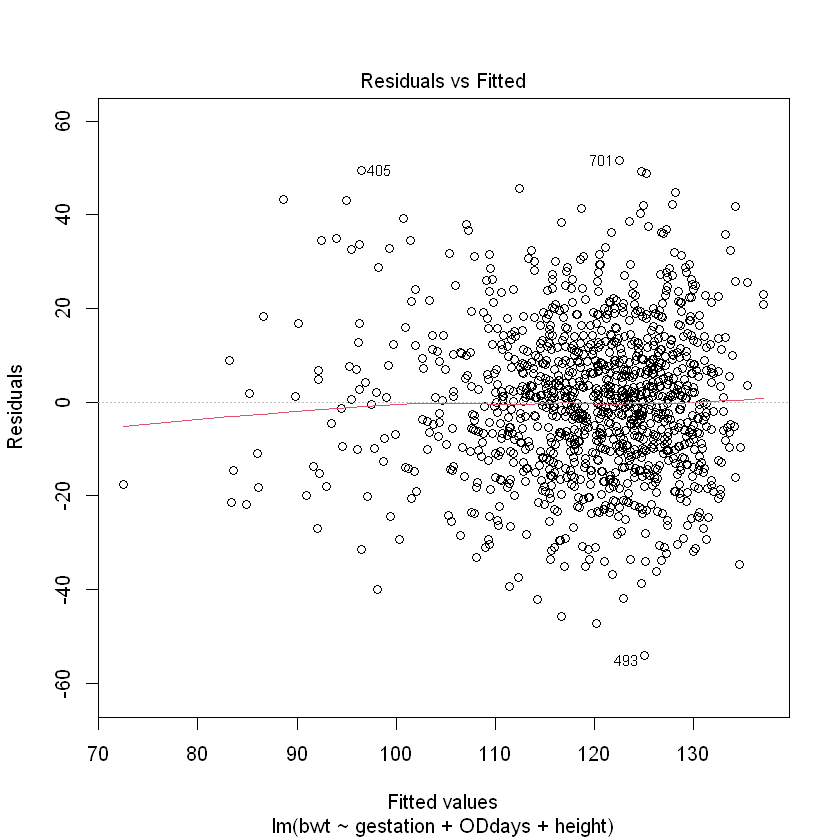

In [42]:
bwt.fit4 = lm(bwt ~ gestation + ODdays + height,
    data = Babies.df,
    subset = -c(239, 820)
)
plot(bwt.fit4, which = 1)


All seems okay. Let us make sure that this makes sense in terms of output.

In [44]:
summary(bwt.fit4)



Call:
lm(formula = bwt ~ gestation + ODdays + height, data = Babies.df, 
    subset = -c(239, 820))

Residuals:
    Min      1Q  Median      3Q     Max 
-53.999 -10.393  -0.050   9.772  51.514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -139.20571   15.05961  -9.244  < 2e-16 ***
gestation      0.65219    0.03703  17.613  < 2e-16 ***
ODdays        -0.89039    0.11543  -7.714 2.61e-14 ***
height         1.21083    0.18495   6.547 8.79e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.94 on 1168 degrees of freedom
Multiple R-squared:  0.2464,	Adjusted R-squared:  0.2445 
F-statistic: 127.3 on 3 and 1168 DF,  p-value: < 2.2e-16


Let us add `weight` to the model. We’re going to save some typing and use the `update`` function to update our model.

In [45]:
bwt.fit5 <- update(bwt.fit4, ~ . + weight)
summary(bwt.fit5)



Call:
lm(formula = bwt ~ gestation + ODdays + height + weight, data = Babies.df, 
    subset = -c(239, 820))

Residuals:
    Min      1Q  Median      3Q     Max 
-53.053 -10.540   0.121  10.076  47.746 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -131.68169   15.14974  -8.692  < 2e-16 ***
gestation      0.65624    0.03688  17.795  < 2e-16 ***
ODdays        -0.90868    0.11502  -7.900 6.41e-15 ***
height         0.90486    0.20453   4.424 1.06e-05 ***
weight         0.08535    0.02485   3.434 0.000615 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.87 on 1167 degrees of freedom
Multiple R-squared:  0.254,	Adjusted R-squared:  0.2514 
F-statistic: 99.32 on 4 and 1167 DF,  p-value: < 2.2e-16
